<a href="https://colab.research.google.com/github/twiesenb/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data_Wiesenberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#reading dataset
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
print(drinks.shape)
drinks.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
drinks.columns
drinks.sort_values('beer_servings', ascending = False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


In [0]:
#creating new column
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'] > 9, 'High',
                           np.where(drinks['total_litres_of_pure_alcohol'] > 6, 'Medium',
                           np.where(drinks['total_litres_of_pure_alcohol'] == 0, 'None', 'Low')))
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,None
1,Albania,89,132,54,4.9,Low
2,Algeria,25,0,14,0.7,Low
3,Andorra,245,138,312,12.4,High
4,Angola,217,57,45,5.9,Low


In [0]:
##joining new dataset

#read countries csv
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
#rename usa
drinks.at[184, 'country'] = 'United States of America'
#time to merge ---use merge function, best practice
df = pd.merge(drinks, countries[['name', 'region', 'sub-region']], how='left', left_on='country', right_on='name') #merge into left df, merge name into country
df.head()

(249, 11)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,None,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,Low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,High,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,Low,Angola,Africa,Sub-Saharan Africa


In [0]:
#which countries did not get joined properly?
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,Low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,Low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,Low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,Low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,Low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,High,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,None,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,Low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,None,NaN,NaN,NaN
92,Laos,62,0,123,6.2,Medium,NaN,NaN,NaN


Text(0.5, 0, 'World Subregion')

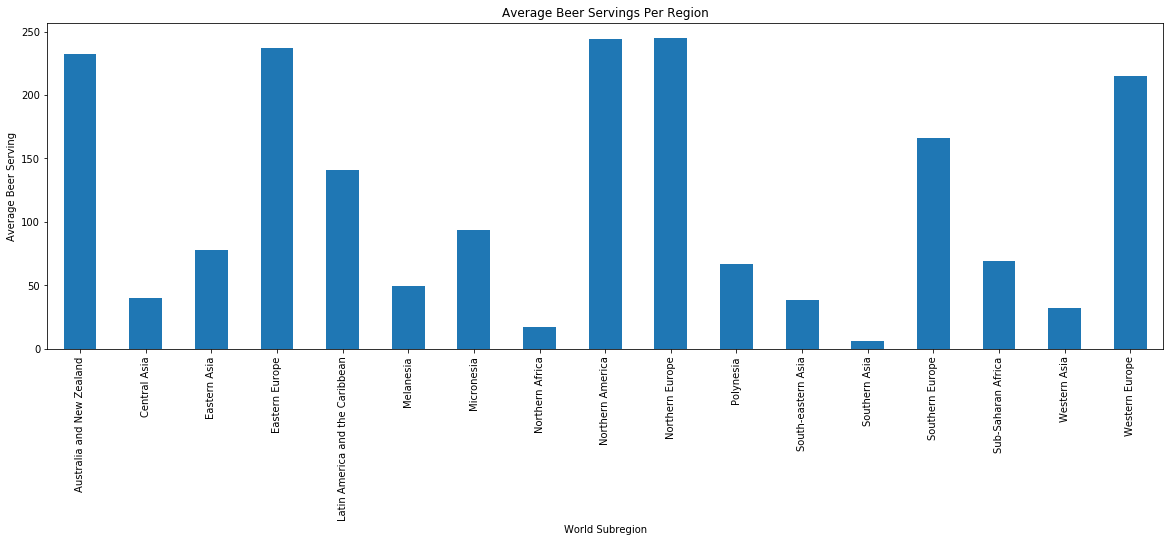

In [0]:
## plot time

#plot subregions
df.groupby('sub-region').beer_servings.mean().plot(kind='bar', figsize =(20,6))
plt.title('Average Beer Servings Per Region')
plt.ylabel('Average Beer Serving')
plt.xlabel('World Subregion')

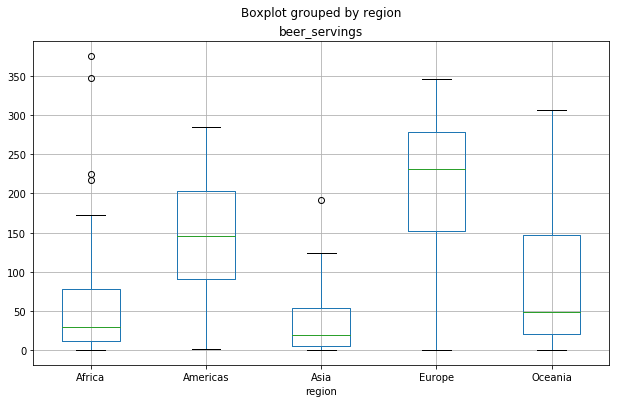

In [0]:
##still plotting
#box plot
df.boxplot(column='beer_servings', by='region', figsize = (10,6))

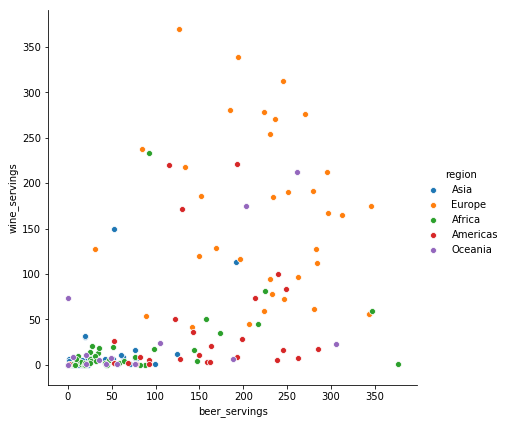

In [0]:
#sns color sorted plot
sns.pairplot(x_vars=["beer_servings"], y_vars=["wine_servings"], data=df, hue="region", height= 6)

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [36]:
# TODO - your code here
# Use what we did live in lecture as an example
from google.colab import files
uploaded = files.upload()


Saving Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv to Behavior of the urban traffic of the city of Sao Paulo in Brazil (1).csv


In [93]:
df = pd.read_csv('Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv', sep=";")
df.head(10) #when I printed the head, it appeared I might have loaded the data incorrectly. 
            #However, when I asked python for some statistical facts about each column, 
            #I discovered that many values are 0 because the columns measure rare events: 
            #road accidents such as a broken-down bus, an accident injury, or an electricity blackout.
df.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"
5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"10,9"
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,3"
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,2"
8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"7,6"
9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,4"


In [53]:
df.boxplot()

(135, 18)

In [54]:
#checking for nan values
df.isna().sum() #I looked for NaN values, but there were none in the dataset.

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

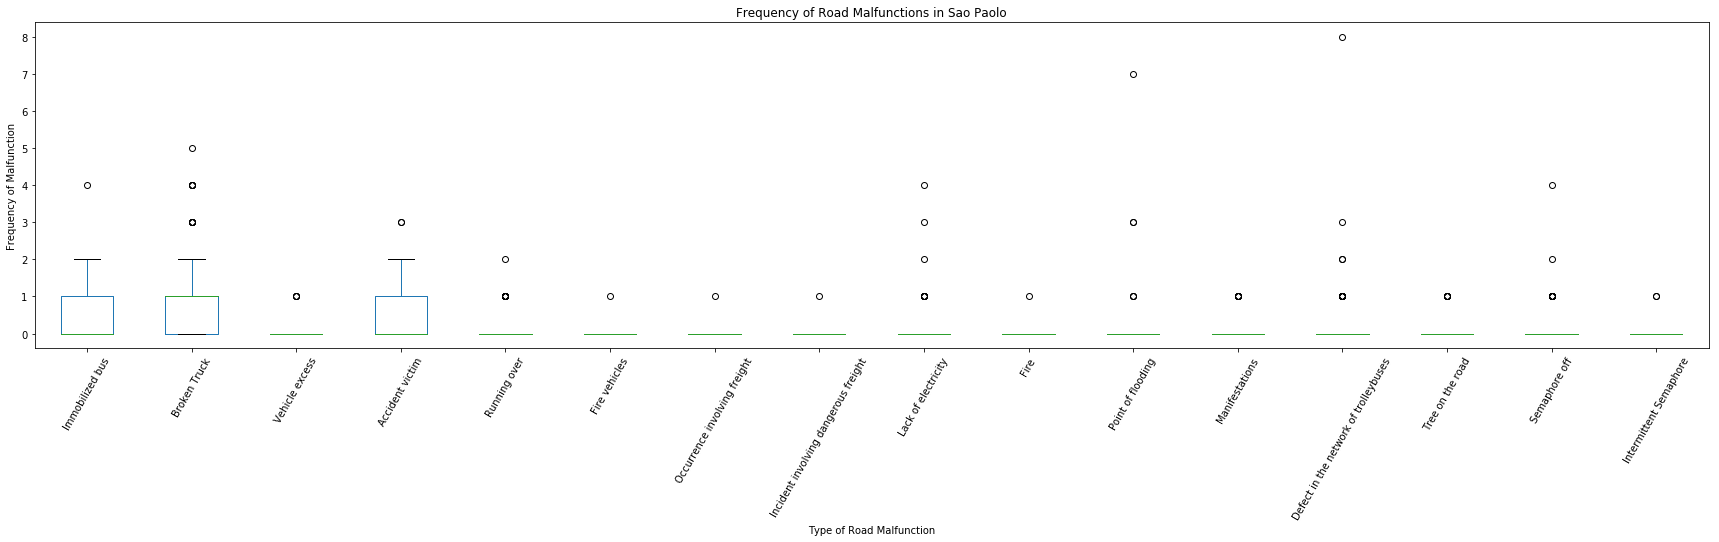

In [68]:
###plot time -- I want to make a boxplot of each column in the dataset, without the Hour or Slowness columns because their range is much larger than the ranges of the other columns, which will make the chart less readable.

##box plot
#drop the slowness and hour columns
df1 = df.drop(['Hour (Coded)', 'Slowness in traffic (%)'], axis=1) #axis=1 tells python to look at columns
#plot box plot
df1.plot(kind='box', figsize=(30,6))
plt.xticks(rotation=60) #rotating the xticks
plt.title('Frequency of Road Malfunctions in Sao Paolo')
plt.xlabel('Type of Road Malfunction')
plt.ylabel('Frequency of Malfunction')
plt.show()


TypeError: ignored

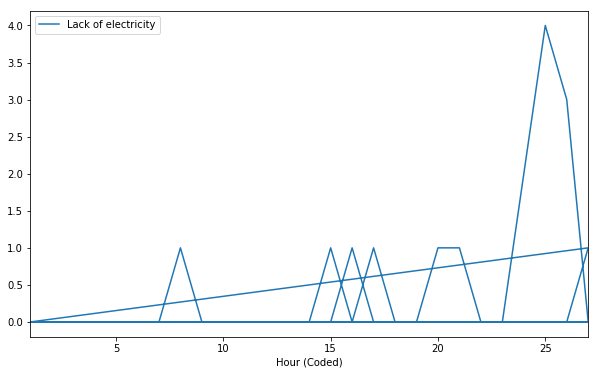

In [89]:
##line plot
df.plot.line(x='Hour (Coded)', y='Lack of electricity', figsize=(10,6))
df.plot.line(x='Hour (Coded)', y='Slowness in traffic (%)', figsize=(10,6))
#I tried to plot instances of "Lack of Electricity" against "Slowness in Traffic", but because the data collectors culturally use commas in decimals where we use periods, python does not think that the numbers are floats or ints. An interesting case where Python is eurocentric!
#The line graph I did make did not seem to connect the scatterpoints in a readable fashion.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

In this project I sought to explore a dataset on traffic slowness in Sao Paolo, Brazil. I found this dataset to be important because traffic is a serious probelm in megacities around the world. First, I looked at the shape of the dataset, and I noticed that the dataset is indexed by consecutive hours over the course of roughly a week. The first peculiarity I noticed was that many of the values in the dataset are 0. However, when I asked python for some statistical facts about each column,  I discovered that many values are 0 because the columns measure rare road events such as a broken-down bus, an accident injury, or an electricity blackout. This indicates that most of the time, there was no reported accident for many of the indexed hours.
After I looked at the shape of the data, I checked for empty (Nan) values to make sure I did not need to impute data. The data required no imputing; all the values were filled.
After checking for missing values, I decided to make a box plot of each column in the dataset to demonstrate the rarity of each event. 
Finally, I tried to plot on a line graph the correlation over time between electricity outages and traffic slowness. However, I ran into trouble because the writers of the dataset denote decimals with a comma, which Python does not understand.

2.  What was the most challenging part of what you did?

I ran into four roadblocks while I worked on this assignment: semicolons seraprating values in the csv, and overlapping ticks on the x axis, non-American denotation of decimals, and an unreadable line graph. I was able to find code online that fixed the first two problems.
The third problem was that the writers of the CSV denotated decimals with commas instead of periods like Americans and Python. I did't know how to fix this problem, because it seemed I would have to replace in that column every comma with a period.
The fourth problem was that the dots of my scatterplot that make up my line graph were connected incorrectly. I think I had a similar problem during the Precourse, but I don't remember the solution.

3.  What was the most interesting thing you learned?

The most interesting thing I learned from this project was how to learn through troubleshooting. I feel like each time I complete an assignment I learn one part from online troubleshooting and two parts from the lecture.
4.  What area would you like to explore with more time?

I'd like to explore more time understanding the difference between pandas plotting and matplotlib plotting, especially the differences in syntax.



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.

In [0]:
joe = { 'name': 'Joe', 'is_female': False, 'age': 19 }
alice = { 'name': 'Alice', 'is_female': True, 'age': 20 }
sarah = { 'name': 'Sarah', 'is_female': True, 'age': 20 }
students = [joe, alice, sarah]
for s in students:
  print(s.values())

In [0]:
GM = {'name': 'Grow Mart', 'founding year' : 1973, 'revenue' : 2.65e5, 'expenses' : 1.83e5}
PD = {'name': 'Plant Depot', 'founding year' : 1973,'revenue' : 3.02e5, 'expenses' : 2.4e5 }
TRU = {'name': 'Trees R Us', 'founding year': 1985, 'revenue': 1.23e5, 'expenses': 1.3e5 }
stores = [GM, PD, TRU]
for s in stores:
  print(s['expenses'] > s['revenue'])
  s.update( {'is_profitable' : (s['expenses'] > s['revenue'])} ) #use update to add new key/value pair to dictionary
print(stores)

^ Following along with Training Kit

In [0]:
import random
words = [
'supplant',
'undulate',
'xenon',
'asymptote', # ← rotates here!
'babushka',
'kart',
'other']
def rotate_point(s = words):
  sorted_words = sorted(s)
  first_word = sorted_words[0]
  print(first_word)
  index_number = words.index(first_word)
  print('The index in the unsorted list of the first word of the sorted list is', index_number)
rotate_point(words)
words_shuffled = random.shuffle(words)
print(words_shuffled)
rotate_point(s = words_shuffled)